# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [11]:
# import Libraries

import pandas as pd
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv("BA_reviews.csv")

In [13]:
df

,Unnamed: 0,reviews
0,0,✅ Trip Verified | BA standards continue to de...
1,1,Not Verified | Awful. Business class check in...
2,2,✅ Trip Verified | Not a reliable airline. You...
3,3,✅ Trip Verified | I take comfort in reading t...
4,4,✅ Trip Verified | The worst journey in my lif...
...,...,...
995,995,✅ Trip Verified | Bucharest to London. They a...
996,996,✅ Trip Verified | Kuala Lumpur to Mexico City ...
997,997,✅ Trip Verified | Miami to London. BA are goi...
998,998,✅ Trip Verified | \r\nI would like to complime...


In [14]:
# Remove the junk column

df = df.iloc[:,1:]

In [15]:
df

,reviews
0,✅ Trip Verified | BA standards continue to de...
1,Not Verified | Awful. Business class check in...
2,✅ Trip Verified | Not a reliable airline. You...
3,✅ Trip Verified | I take comfort in reading t...
4,✅ Trip Verified | The worst journey in my lif...
...,...
995,✅ Trip Verified | Bucharest to London. They a...
996,✅ Trip Verified | Kuala Lumpur to Mexico City ...
997,✅ Trip Verified | Miami to London. BA are goi...
998,✅ Trip Verified | \r\nI would like to complime...


In [16]:
# Find the duplicate value

df.duplicated().sum()

0

No duplicate values in the dataset

In [17]:
# Find the missing values

df.isna().sum()

reviews    0
dtype: int64

No missing values

In [19]:
import requests
from bs4 import BeautifulSoup

# Specify the URL of the British Airways review page on Skytrax
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"

# Specify the number of pages to scrape
pages = 5

# Specify the number of reviews per page
page_size = 50

# Initialize a list to store the scraped review data
reviews = []

try:
    for i in range(1, pages + 1):
        print(f"Scraping page {i}")
        url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"
        response = requests.get(url)
        content = response.content
        parsed_content = BeautifulSoup(content, 'html.parser')
        
        # Extract and store review data in the desired format
        for para in parsed_content.find_all("div", {"class": "text_content"}):
            reviews.append(para.get_text())

        print(f"   ---> {len(reviews)} total reviews")

except Exception as e:
    print(f"An error occurred: {e}")

# Store the scraped data in the desired format (e.g., text file, CSV, etc.)
# Example: You can write the reviews to a text file
with open("british_airways_reviews.txt", "w", encoding="utf-8") as file:
    file.write("\n".join(reviews))


Scraping page 1
   ---> 50 total reviews
Scraping page 2
   ---> 100 total reviews
Scraping page 3
   ---> 150 total reviews
Scraping page 4
   ---> 200 total reviews
Scraping page 5
   ---> 250 total reviews


In [20]:


# Assuming you have already scraped and stored the reviews in the 'reviews' list

# Create a DataFrame from the 'reviews' list
df = pd.DataFrame({'Reviews': reviews})

# Display the first few rows of the DataFrame
print(df.head())


                                             Reviews
0  ✅ Trip Verified |  BA standards continue to de...
1  Not Verified |  Awful. Business class check in...
2  ✅ Trip Verified |  Not a reliable airline. You...
3  ✅ Trip Verified |  I take comfort in reading t...
4  ✅ Trip Verified |  The worst journey in my lif...


<h3>1.Data Cleaning:</h3>
<p>
Text Cleaning: Remove any HTML tags, punctuation, special characters, and numbers from the text to clean it up.</p>

In [21]:
df['Cleaned_Reviews'] = df['Reviews'].str.replace(r'<[^>]+>', '', regex=True)
df['Cleaned_Reviews'] = df['Cleaned_Reviews'].str.replace(r'[^a-zA-Z\s]', '', regex=True)
df['Cleaned_Reviews'] = df['Cleaned_Reviews'].str.lower()


Stopword Removal: Remove common stopwords to reduce noise in the text data.

In [31]:
# from nltk.corpus import stopwords

# stop_words = set(stopwords.words('english'))
# df['Cleaned_Reviews'] = df['Cleaned_Reviews'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))


Tokenization: Tokenize the cleaned text into words.

In [23]:
df['Tokens'] = df['Cleaned_Reviews'].apply(lambda x: x.split())


<h3>2. Text Analysis:</h3><p>
Sentiment Analysis: Analyze the sentiment of each review using a sentiment analysis library like NLTK or TextBlob. It can help you understand overall sentiment trends in the reviews.<?p>

In [24]:
from textblob import TextBlob
df['Sentiment'] = df['Cleaned_Reviews'].apply(lambda x: TextBlob(x).sentiment.polarity)


Topic Modeling: Perform topic modeling to identify common topics or themes within the reviews using techniques like Latent Dirichlet Allocation (LDA) or Non-Negative Matrix Factorization (NMF).

<h3>3. Data Visualization:</h3><p>
Word Clouds: Create word clouds to visualize the most frequent words in the reviews.

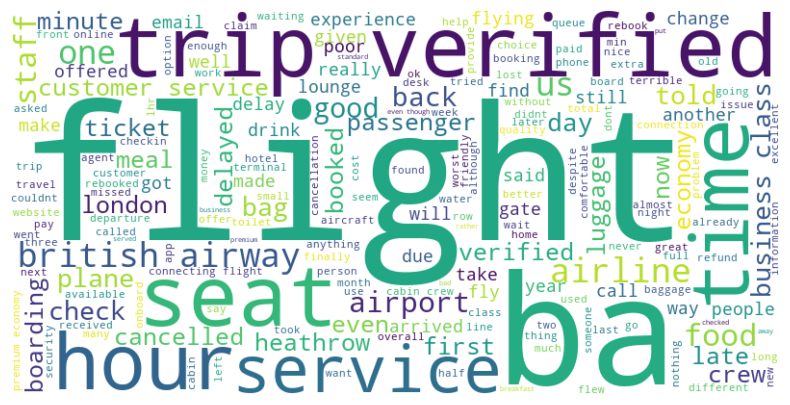

In [26]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['Cleaned_Reviews']))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


Sentiment Distribution: Visualize the distribution of sentiment scores in the reviews.

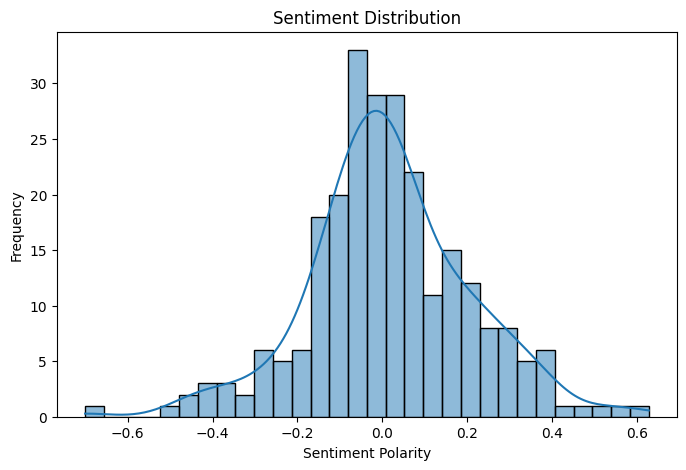

In [27]:
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(df['Sentiment'], bins=30, kde=True)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()
